In [1]:
%matplotlib notebook

In [2]:
import ROOT
from ROOT import TFile, TTree, TCanvas, TH2D, TH1F
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

Welcome to JupyROOT 6.22/09


In [3]:
f = TFile("selectedEventsTrueRecoBoth_withTrueTrkDir_withParticleEs_111124.root","READ") # have particle energies, AND corrected so everything is in GeV
t = f.Get("selectedEvents")

entries = t.GetEntries()
print(entries)

10913


In [4]:
reco_mu_pX_list = []
truth_mu_pX_list = []
reco_mu_pY_list = []
truth_mu_pY_list = []
reco_mu_pZ_list = []
truth_mu_pZ_list = []

reco_pi_pX_list = []
truth_pi_pX_list = []
reco_pi_pY_list = []
truth_pi_pY_list = []
reco_pi_pZ_list = []
truth_pi_pZ_list = []

reco_lp_pX_list = []
truth_lp_pX_list = []
reco_lp_pY_list = []
truth_lp_pY_list = []
reco_lp_pZ_list = []
truth_lp_pZ_list = []

weights_list = []

completeness = 0.5

# main loop
for e in range(entries):
    
    t.GetEntry(e)
    
    # passes both selection and requiring completeness in reco
    #if (t.passedSel_ == 3) and (t.recoSel_trackCompMu_ > completeness) and (t.recoSel_trackCompPi_ > completeness) and (t.recoSel_trackCompP_ > completeness): 
    #if (t.passedSel_ == 3) and (t.recoSel_recoContained_==2): 
    if (t.passedSel_ == 3) and (t.recoSel_trackCompMu_ > completeness) and (t.recoSel_trackCompPi_ > completeness) and (t.recoSel_trackCompP_ > completeness) and (t.recoSel_recoContained_==2): 
        
        reco_mu_pX_list.append(t.recoSel_trkDirMuX_)
        truth_mu_pX_list.append(t.truthSel_pxMu_)
        reco_mu_pY_list.append(t.recoSel_trkDirMuY_)
        truth_mu_pY_list.append(t.truthSel_pyMu_)
        reco_mu_pZ_list.append(t.recoSel_trkDirMuZ_)
        truth_mu_pZ_list.append(t.truthSel_pzMu_)
        
        reco_pi_pX_list.append(t.recoSel_trkDirPiX_)
        truth_pi_pX_list.append(t.truthSel_pxPi_)
        reco_pi_pY_list.append(t.recoSel_trkDirPiY_)
        truth_pi_pY_list.append(t.truthSel_pyPi_)
        reco_pi_pZ_list.append(t.recoSel_trkDirPiZ_)
        truth_pi_pZ_list.append(t.truthSel_pzPi_)
        
        reco_lp_pX_list.append(t.recoSel_trkDirPX_)
        truth_lp_pX_list.append(t.truthSel_pxP_)
        reco_lp_pY_list.append(t.recoSel_trkDirPY_)
        truth_lp_pY_list.append(t.truthSel_pyP_)
        reco_lp_pZ_list.append(t.recoSel_trkDirPZ_)
        truth_lp_pZ_list.append(t.truthSel_pzP_)
        
        weights_list.append(t.weight_)

reco_mu_pX_arr = np.asarray(reco_mu_pX_list)
truth_mu_pX_arr = np.asarray(truth_mu_pX_list)
reco_mu_pY_arr = np.asarray(reco_mu_pY_list)
truth_mu_pY_arr = np.asarray(truth_mu_pY_list)
reco_mu_pZ_arr = np.asarray(reco_mu_pZ_list)
truth_mu_pZ_arr = np.asarray(truth_mu_pZ_list)

reco_pi_pX_arr = np.asarray(reco_pi_pX_list)
truth_pi_pX_arr = np.asarray(truth_pi_pX_list)
reco_pi_pY_arr = np.asarray(reco_pi_pY_list)
truth_pi_pY_arr = np.asarray(truth_pi_pY_list)
reco_pi_pZ_arr = np.asarray(reco_pi_pZ_list)
truth_pi_pZ_arr = np.asarray(truth_pi_pZ_list)

reco_lp_pX_arr = np.asarray(reco_lp_pX_list)
truth_lp_pX_arr = np.asarray(truth_lp_pX_list)
reco_lp_pY_arr = np.asarray(reco_lp_pY_list)
truth_lp_pY_arr = np.asarray(truth_lp_pY_list)
reco_lp_pZ_arr = np.asarray(reco_lp_pZ_list)
truth_lp_pZ_arr = np.asarray(truth_lp_pZ_list)

weights_arr = np.asarray(weights_list)

   

In [5]:
# POT scaling for events that passed reco only

targetPOT = 1.3e21
sumPOT = 4.68e20 # this is for run 1
#sumPOT = 8.98e20 # this is for run 3

scale = targetPOT / sumPOT
print("Scale is: ", scale)

print(np.sum(weights_arr))
totalEvents = np.sum(weights_arr)*scale
print("totalEvents: ", totalEvents)

Scale is:  2.7777777777777777
480.3657590386961
totalEvents:  1334.3493306630448


<IPython.core.display.Javascript object>


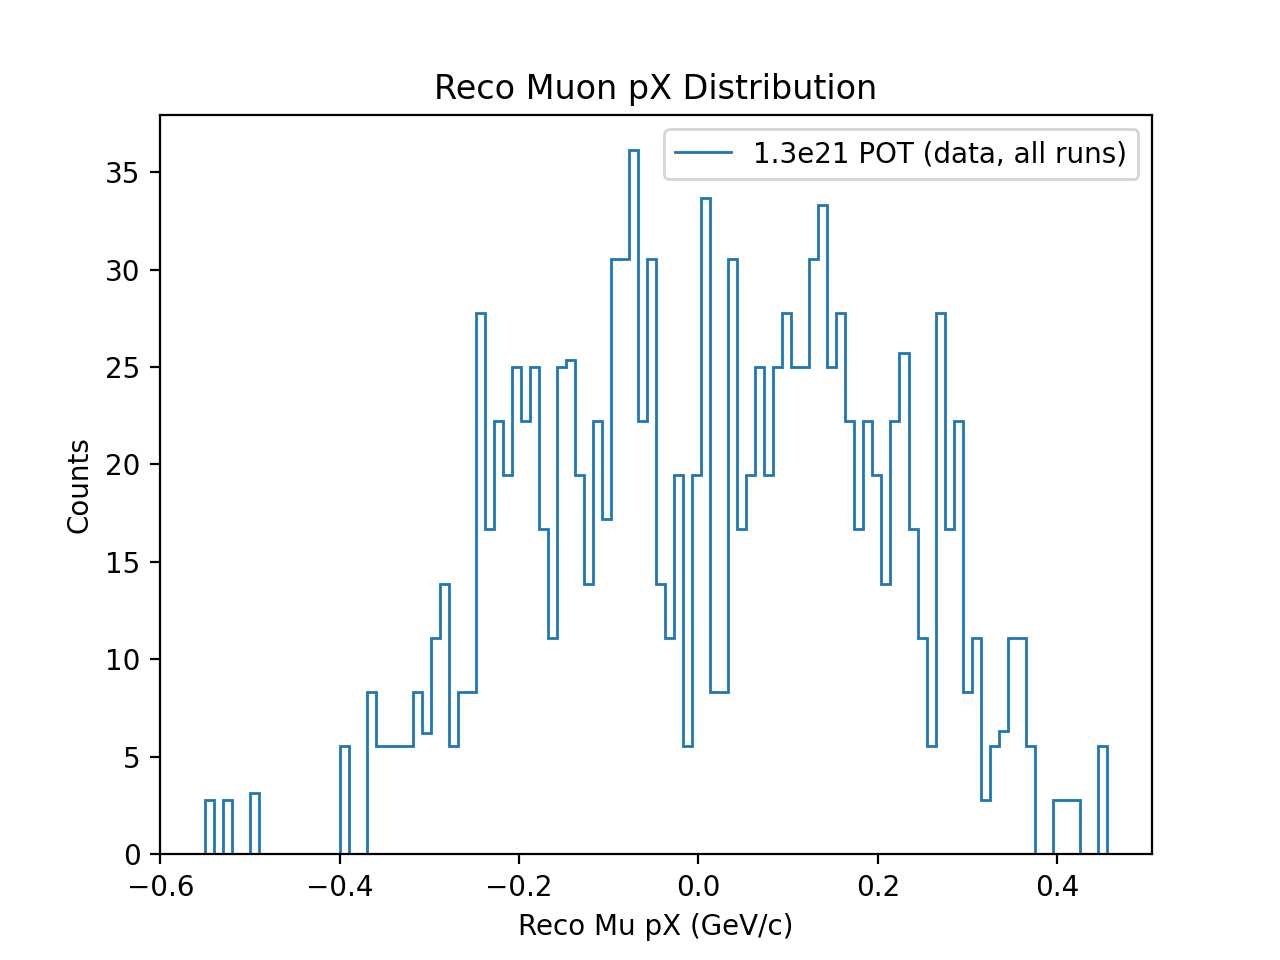

In [6]:
# reco mu pX

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

counts, bins = np.histogram(reco_mu_pX_arr, bins=100, weights=weights_arr)
scaledCounts = counts*scale


plt.stairs(scaledCounts, bins, label="1.3e21 POT (data, all runs)")
#plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")

plt.xlabel('Reco Mu pX (GeV/c)')
plt.ylabel('Counts')
plt.title('Reco Muon pX Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


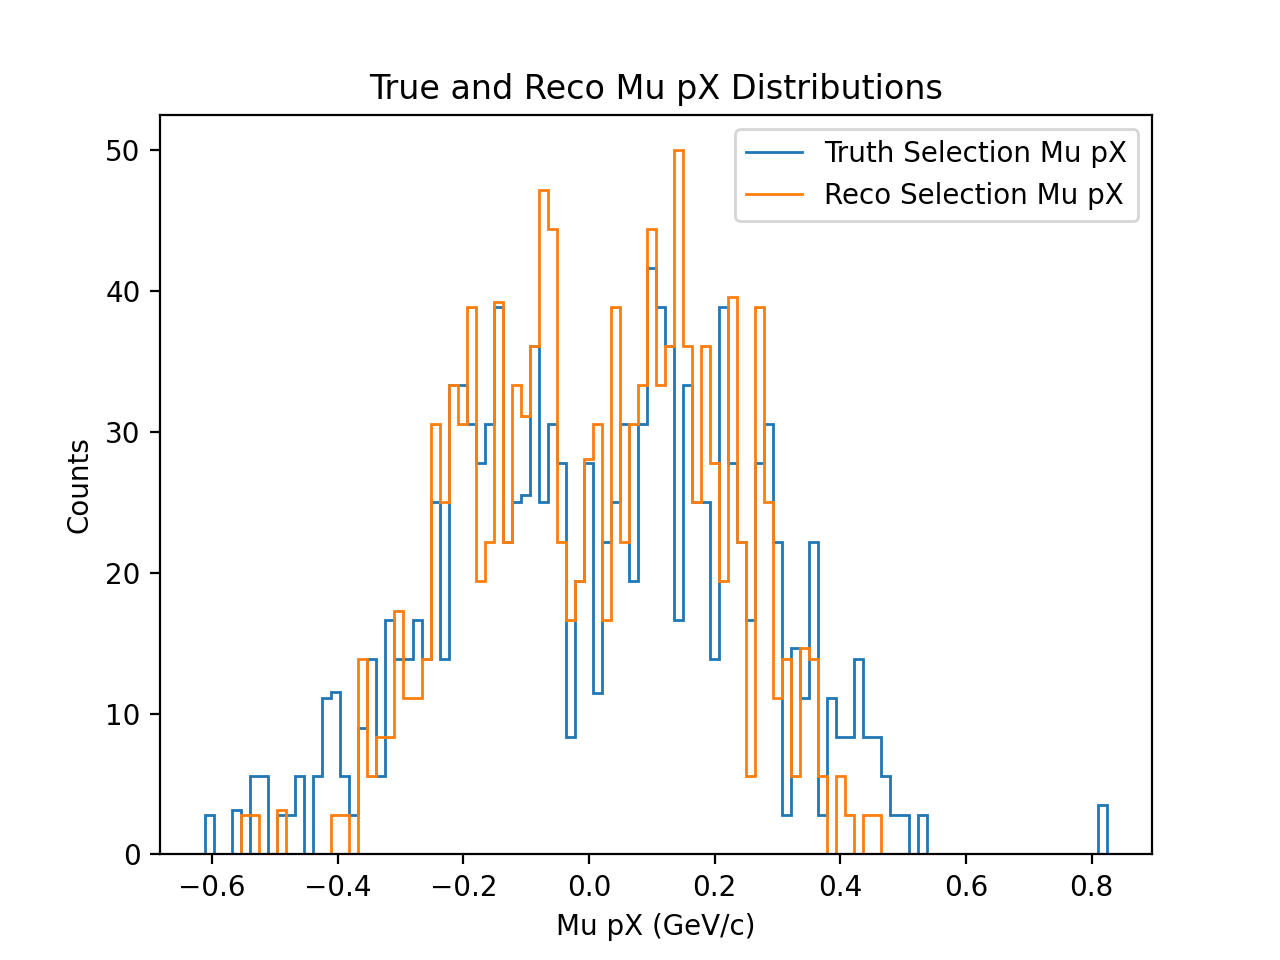

max value of truth:  0.8243250732421875
max value of reco:  0.45545810121500097
maxRange:  0.8243250732421875
truth bins:  [-0.61133936 -0.59698271 -0.58262607 -0.56826942 -0.55391278 -0.53955613
 -0.52519949 -0.51084285 -0.4964862  -0.48212956 -0.46777291 -0.45341627
 -0.43905962 -0.42470298 -0.41034634 -0.39598969 -0.38163305 -0.3672764
 -0.35291976 -0.33856311 -0.32420647 -0.30984983 -0.29549318 -0.28113654
 -0.26677989 -0.25242325 -0.2380666  -0.22370996 -0.20935332 -0.19499667
 -0.18064003 -0.16628338 -0.15192674 -0.13757009 -0.12321345 -0.10885681
 -0.09450016 -0.08014352 -0.06578687 -0.05143023 -0.03707358 -0.02271694
 -0.0083603   0.00599635  0.02035299  0.03470964  0.04906628  0.06342293
  0.07777957  0.09213621  0.10649286  0.1208495   0.13520615  0.14956279
  0.16391944  0.17827608  0.19263272  0.20698937  0.22134601  0.23570266
  0.2500593   0.26441595  0.27877259  0.29312923  0.30748588  0.32184252
  0.33619917  0.35055581  0.36491246  0.3792691   0.39362574  0.40798239
  

In [7]:
# truth and reco muon pX plot

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(truth_mu_pX_arr)
maxReco = np.max(reco_mu_pX_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(truth_mu_pX_arr)
minReco = np.min(reco_mu_pX_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(truth_mu_pX_arr, bins=numberBins, weights=weights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("truth bins: ", binsTrue)

print(sum(countsTrue))
print(sum(scaledCountsTrue))

countsReco, binsReco = np.histogram(reco_mu_pX_arr, bins=numberBins, weights=weights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("reco bins: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Selection Mu pX")
plt.stairs(scaledCountsReco, binsReco, label="Reco Selection Mu pX")

plt.xlabel('Mu pX (GeV/c)')
plt.ylabel('Counts')
plt.title('True and Reco Mu pX Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


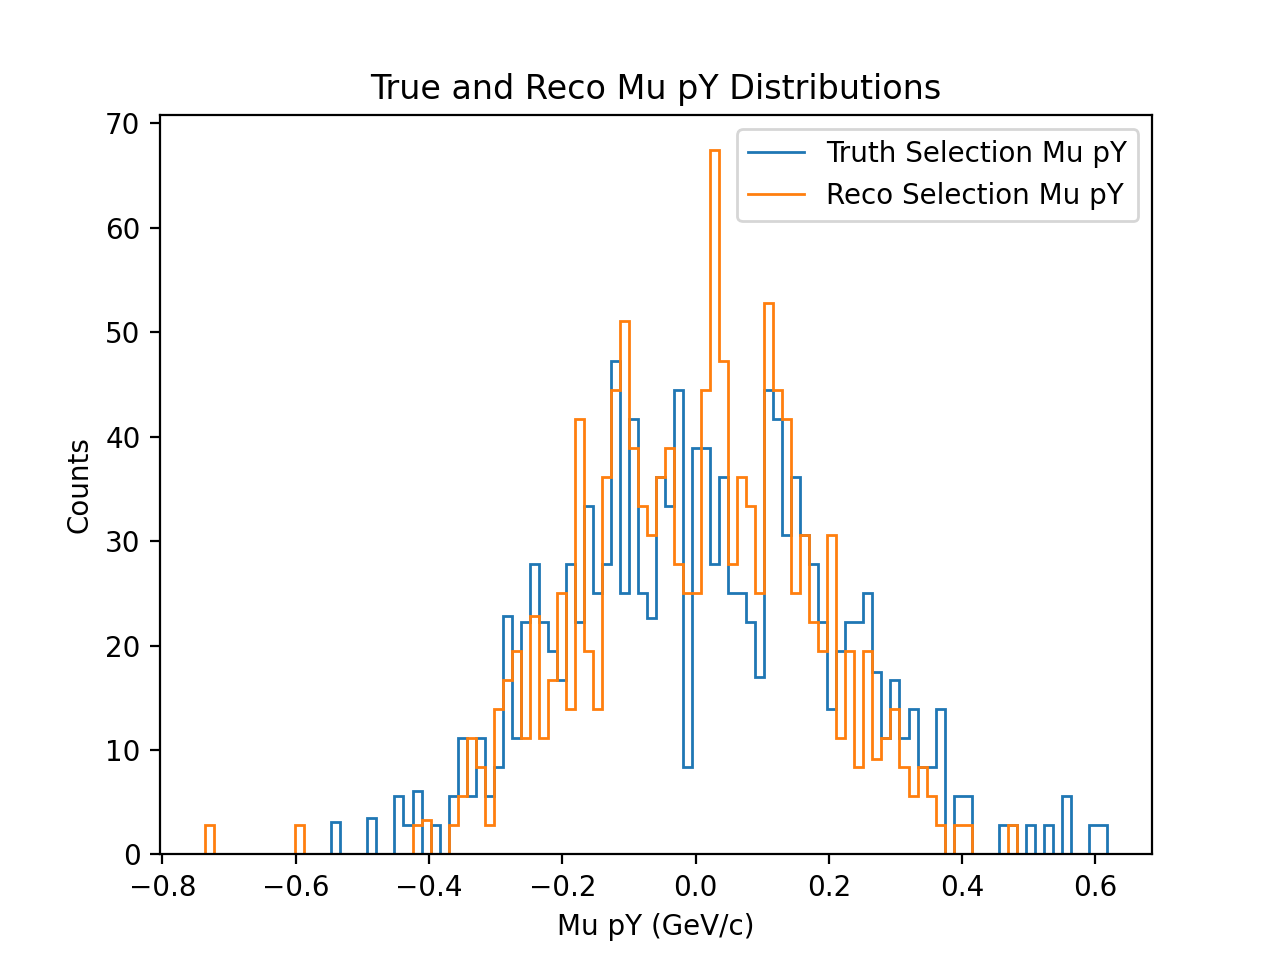

max value of truth:  0.6174170532226563
max value of reco:  0.4738903937609704
maxRange:  0.6174170532226563
truth bins:  [-0.7360381  -0.72250354 -0.70896899 -0.69543444 -0.68189989 -0.66836534
 -0.65483079 -0.64129623 -0.62776168 -0.61422713 -0.60069258 -0.58715803
 -0.57362348 -0.56008893 -0.54655437 -0.53301982 -0.51948527 -0.50595072
 -0.49241617 -0.47888162 -0.46534707 -0.45181251 -0.43827796 -0.42474341
 -0.41120886 -0.39767431 -0.38413976 -0.37060521 -0.35707065 -0.3435361
 -0.33000155 -0.316467   -0.30293245 -0.2893979  -0.27586334 -0.26232879
 -0.24879424 -0.23525969 -0.22172514 -0.20819059 -0.19465604 -0.18112148
 -0.16758693 -0.15405238 -0.14051783 -0.12698328 -0.11344873 -0.09991418
 -0.08637962 -0.07284507 -0.05931052 -0.04577597 -0.03224142 -0.01870687
 -0.00517231  0.00836224  0.02189679  0.03543134  0.04896589  0.06250044
  0.07603499  0.08956955  0.1031041   0.11663865  0.1301732   0.14370775
  0.1572423   0.17077685  0.18431141  0.19784596  0.21138051  0.22491506
  0

In [8]:
# truth and reco muon pY plot

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(truth_mu_pY_arr)
maxReco = np.max(reco_mu_pY_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(truth_mu_pY_arr)
minReco = np.min(reco_mu_pY_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(truth_mu_pY_arr, bins=numberBins, weights=weights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("truth bins: ", binsTrue)

print(sum(countsTrue))
print(sum(scaledCountsTrue))

countsReco, binsReco = np.histogram(reco_mu_pY_arr, bins=numberBins, weights=weights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("reco bins: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Selection Mu pY")
plt.stairs(scaledCountsReco, binsReco, label="Reco Selection Mu pY")

plt.xlabel('Mu pY (GeV/c)')
plt.ylabel('Counts')
plt.title('True and Reco Mu pY Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


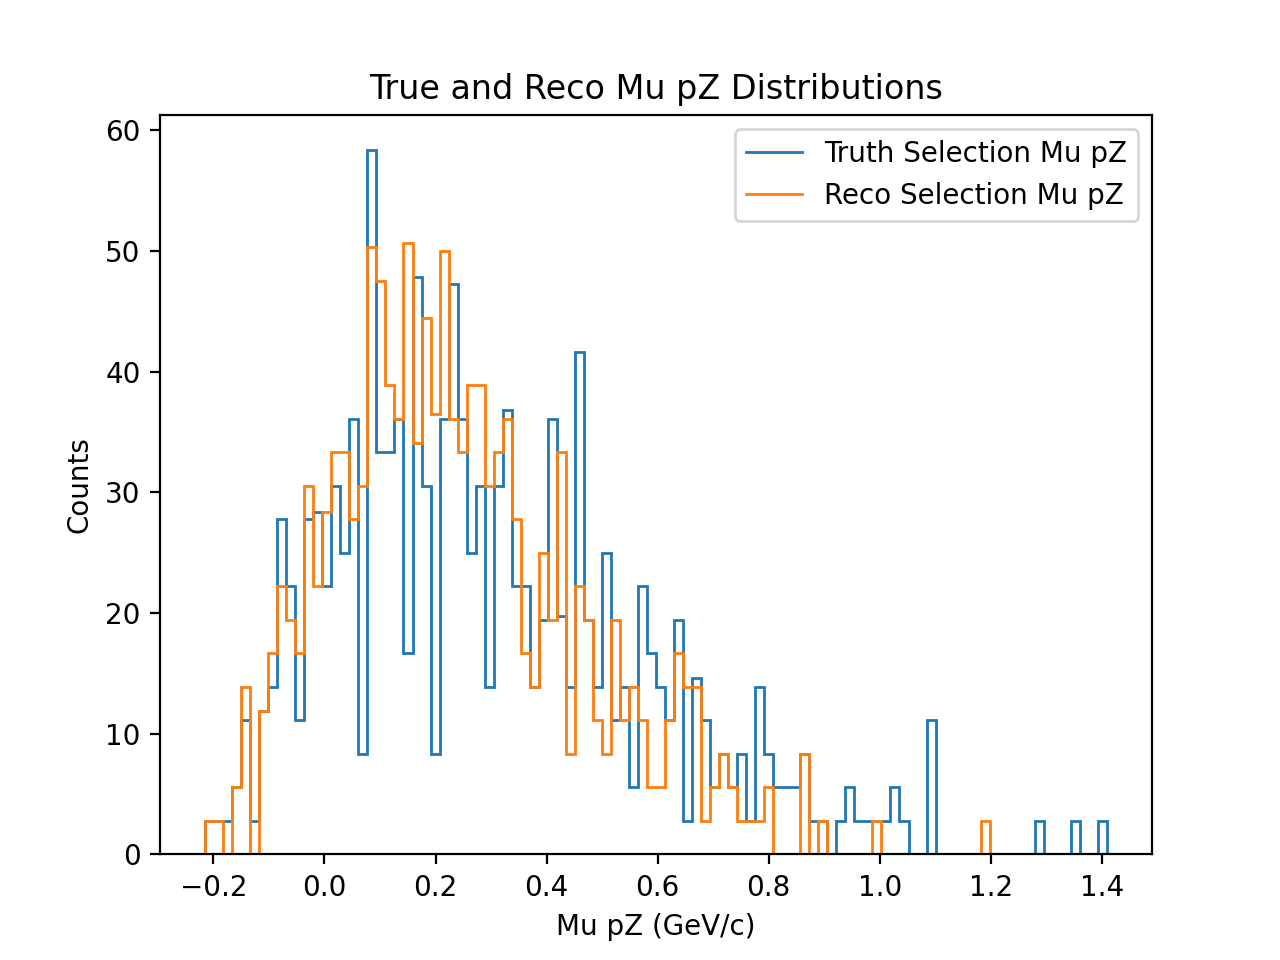

max value of truth:  1.408954345703125
max value of reco:  1.1944591108364615
maxRange:  1.408954345703125
truth bins:  [-0.21502612 -0.19878632 -0.18254651 -0.16630671 -0.1500669  -0.1338271
 -0.11758729 -0.10134749 -0.08510769 -0.06886788 -0.05262808 -0.03638827
 -0.02014847 -0.00390866  0.01233114  0.02857095  0.04481075  0.06105056
  0.07729036  0.09353017  0.10976997  0.12600978  0.14224958  0.15848938
  0.17472919  0.19096899  0.2072088   0.2234486   0.23968841  0.25592821
  0.27216802  0.28840782  0.30464763  0.32088743  0.33712724  0.35336704
  0.36960685  0.38584665  0.40208646  0.41832626  0.43456606  0.45080587
  0.46704567  0.48328548  0.49952528  0.51576509  0.53200489  0.5482447
  0.5644845   0.58072431  0.59696411  0.61320392  0.62944372  0.64568353
  0.66192333  0.67816313  0.69440294  0.71064274  0.72688255  0.74312235
  0.75936216  0.77560196  0.79184177  0.80808157  0.82432138  0.84056118
  0.85680099  0.87304079  0.8892806   0.9055204   0.92176021  0.93800001
  0.95

In [9]:
# truth and reco muon pZ plot

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(truth_mu_pZ_arr)
maxReco = np.max(reco_mu_pZ_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(truth_mu_pZ_arr)
minReco = np.min(reco_mu_pZ_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(truth_mu_pZ_arr, bins=numberBins, weights=weights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("truth bins: ", binsTrue)

print(sum(countsTrue))
print(sum(scaledCountsTrue))

countsReco, binsReco = np.histogram(reco_mu_pZ_arr, bins=numberBins, weights=weights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("reco bins: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Selection Mu pZ")
plt.stairs(scaledCountsReco, binsReco, label="Reco Selection Mu pZ")

plt.xlabel('Mu pZ (GeV/c)')
plt.ylabel('Counts')
plt.title('True and Reco Mu pZ Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


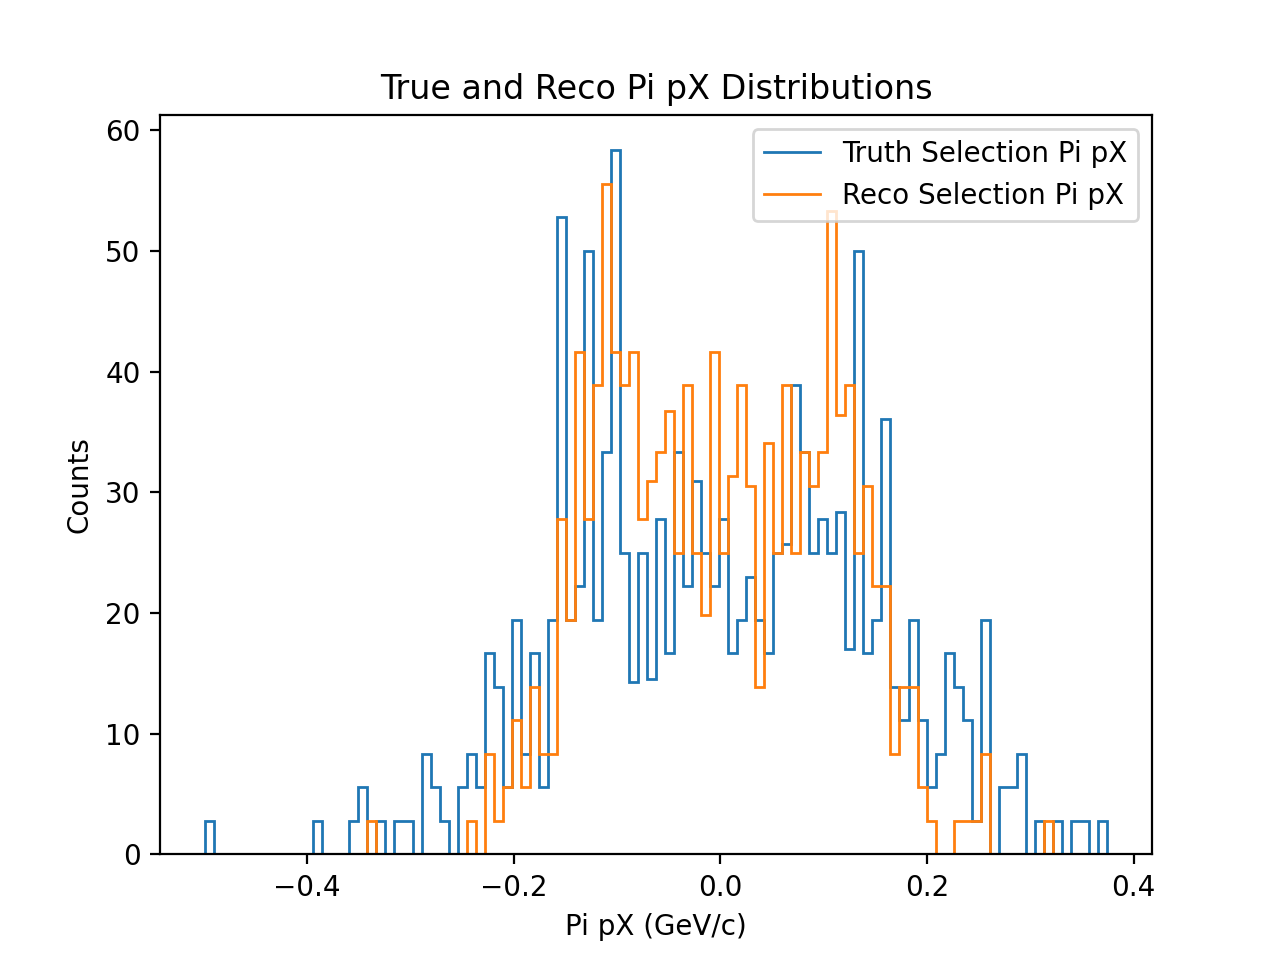

max value of truth:  0.3741181945800781
max value of reco:  0.31995544271548726
maxRange:  0.3741181945800781
truth bins:  [-0.49885059 -0.4901209  -0.48139121 -0.47266152 -0.46393183 -0.45520215
 -0.44647246 -0.43774277 -0.42901308 -0.4202834  -0.41155371 -0.40282402
 -0.39409433 -0.38536464 -0.37663496 -0.36790527 -0.35917558 -0.35044589
 -0.34171621 -0.33298652 -0.32425683 -0.31552714 -0.30679745 -0.29806777
 -0.28933808 -0.28060839 -0.2718787  -0.26314902 -0.25441933 -0.24568964
 -0.23695995 -0.22823026 -0.21950058 -0.21077089 -0.2020412  -0.19331151
 -0.18458182 -0.17585214 -0.16712245 -0.15839276 -0.14966307 -0.14093339
 -0.1322037  -0.12347401 -0.11474432 -0.10601463 -0.09728495 -0.08855526
 -0.07982557 -0.07109588 -0.0623662  -0.05363651 -0.04490682 -0.03617713
 -0.02744744 -0.01871776 -0.00998807 -0.00125838  0.00747131  0.01620099
  0.02493068  0.03366037  0.04239006  0.05111975  0.05984943  0.06857912
  0.07730881  0.0860385   0.09476818  0.10349787  0.11222756  0.12095725
 

In [10]:
# truth and reco pion pX plot

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(truth_pi_pX_arr)
maxReco = np.max(reco_pi_pX_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(truth_pi_pX_arr)
minReco = np.min(reco_pi_pX_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(truth_pi_pX_arr, bins=numberBins, weights=weights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("truth bins: ", binsTrue)

print(sum(countsTrue))
print(sum(scaledCountsTrue))

countsReco, binsReco = np.histogram(reco_pi_pX_arr, bins=numberBins, weights=weights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("reco bins: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Selection Pi pX")
plt.stairs(scaledCountsReco, binsReco, label="Reco Selection Pi pX")

plt.xlabel('Pi pX (GeV/c)')
plt.ylabel('Counts')
plt.title('True and Reco Pi pX Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


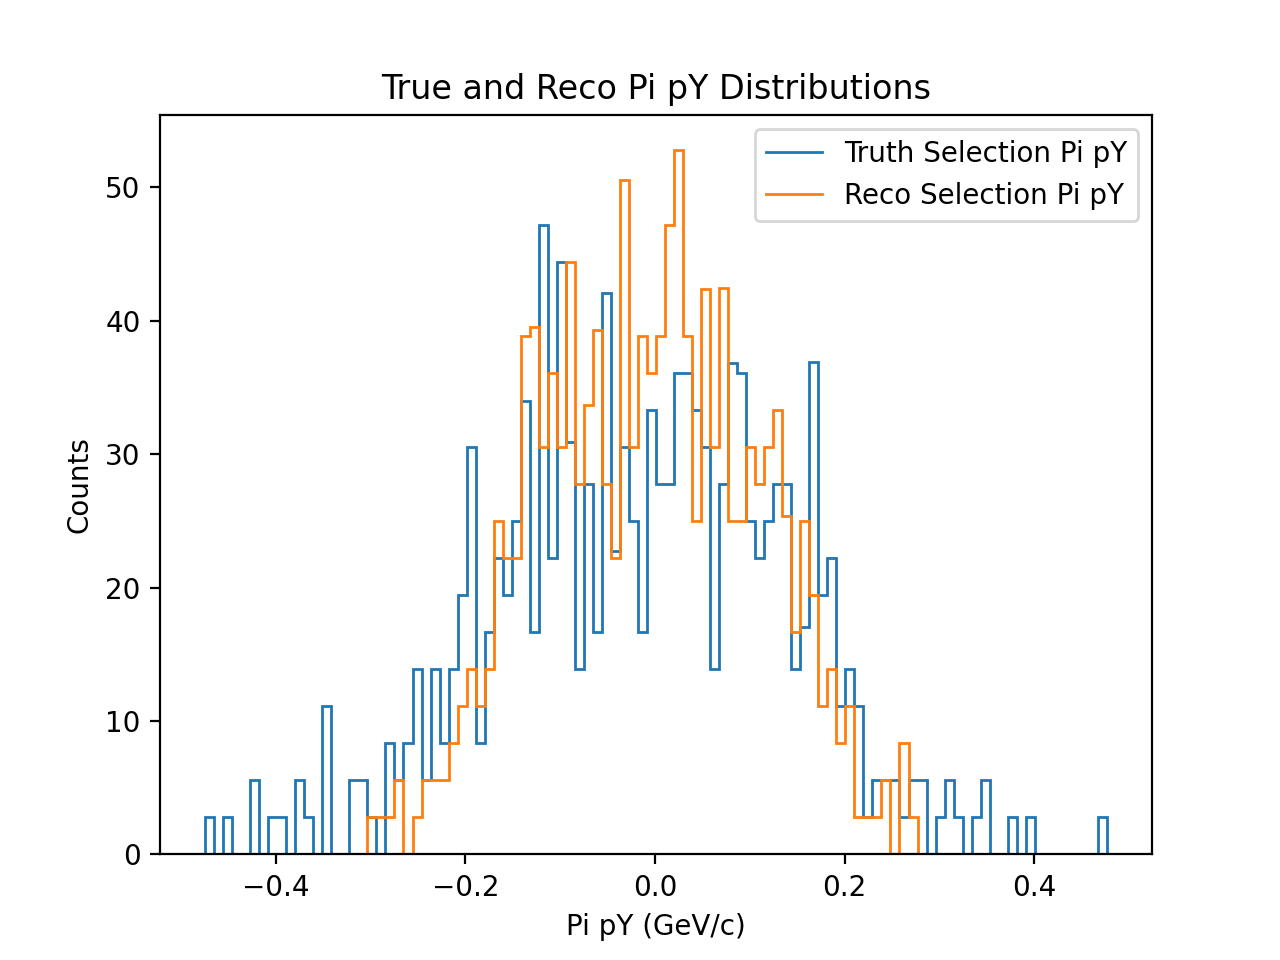

max value of truth:  0.4768458251953125
max value of reco:  0.27222294214791226
maxRange:  0.4768458251953125
truth bins:  [-0.47466086 -0.46514579 -0.45563072 -0.44611566 -0.43660059 -0.42708552
 -0.41757046 -0.40805539 -0.39854032 -0.38902526 -0.37951019 -0.36999512
 -0.36048006 -0.35096499 -0.34144992 -0.33193486 -0.32241979 -0.31290472
 -0.30338966 -0.29387459 -0.28435952 -0.27484445 -0.26532939 -0.25581432
 -0.24629925 -0.23678419 -0.22726912 -0.21775405 -0.20823899 -0.19872392
 -0.18920885 -0.17969379 -0.17017872 -0.16066365 -0.15114859 -0.14163352
 -0.13211845 -0.12260339 -0.11308832 -0.10357325 -0.09405818 -0.08454312
 -0.07502805 -0.06551298 -0.05599792 -0.04648285 -0.03696778 -0.02745272
 -0.01793765 -0.00842258  0.00109248  0.01060755  0.02012262  0.02963768
  0.03915275  0.04866782  0.05818288  0.06769795  0.07721302  0.08672809
  0.09624315  0.10575822  0.11527329  0.12478835  0.13430342  0.14381849
  0.15333355  0.16284862  0.17236369  0.18187875  0.19139382  0.20090889
 

In [11]:
# truth and reco pion pY plot

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(truth_pi_pY_arr)
maxReco = np.max(reco_pi_pY_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(truth_pi_pY_arr)
minReco = np.min(reco_pi_pY_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(truth_pi_pY_arr, bins=numberBins, weights=weights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("truth bins: ", binsTrue)

print(sum(countsTrue))
print(sum(scaledCountsTrue))

countsReco, binsReco = np.histogram(reco_pi_pY_arr, bins=numberBins, weights=weights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("reco bins: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Selection Pi pY")
plt.stairs(scaledCountsReco, binsReco, label="Reco Selection Pi pY")

plt.xlabel('Pi pY (GeV/c)')
plt.ylabel('Counts')
plt.title('True and Reco Pi pY Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


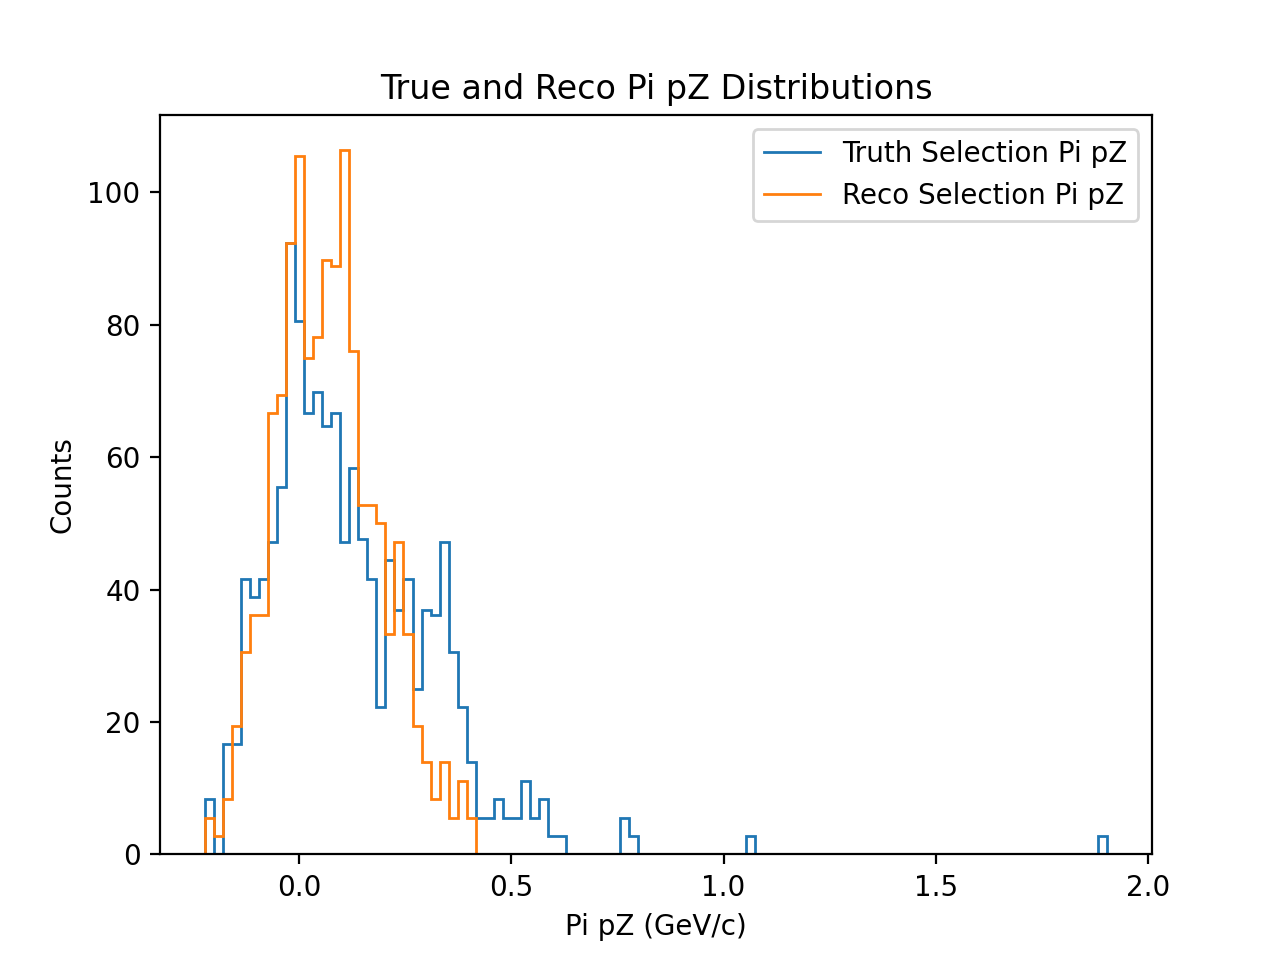

max value of truth:  1.9038916015625
max value of reco:  0.41398309234421876
maxRange:  1.9038916015625
truth bins:  [-0.22219586 -0.20093499 -0.17967411 -0.15841324 -0.13715236 -0.11589149
 -0.09463061 -0.07336974 -0.05210886 -0.03084799 -0.00958712  0.01167376
  0.03293463  0.05419551  0.07545638  0.09671726  0.11797813  0.13923901
  0.16049988  0.18176076  0.20302163  0.22428251  0.24554338  0.26680425
  0.28806513  0.309326    0.33058688  0.35184775  0.37310863  0.3943695
  0.41563038  0.43689125  0.45815213  0.479413    0.50067388  0.52193475
  0.54319563  0.5644565   0.58571737  0.60697825  0.62823912  0.6495
  0.67076087  0.69202175  0.71328262  0.7345435   0.75580437  0.77706525
  0.79832612  0.819587    0.84084787  0.86210874  0.88336962  0.90463049
  0.92589137  0.94715224  0.96841312  0.98967399  1.01093487  1.03219574
  1.05345662  1.07471749  1.09597837  1.11723924  1.13850011  1.15976099
  1.18102186  1.20228274  1.22354361  1.24480449  1.26606536  1.28732624
  1.30858711

In [12]:
# truth and reco pion pZ plot

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(truth_pi_pZ_arr)
maxReco = np.max(reco_pi_pZ_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(truth_pi_pZ_arr)
minReco = np.min(reco_pi_pZ_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(truth_pi_pZ_arr, bins=numberBins, weights=weights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("truth bins: ", binsTrue)

print(sum(countsTrue))
print(sum(scaledCountsTrue))

countsReco, binsReco = np.histogram(reco_pi_pZ_arr, bins=numberBins, weights=weights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("reco bins: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Selection Pi pZ")
plt.stairs(scaledCountsReco, binsReco, label="Reco Selection Pi pZ")

plt.xlabel('Pi pZ (GeV/c)')
plt.ylabel('Counts')
plt.title('True and Reco Pi pZ Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


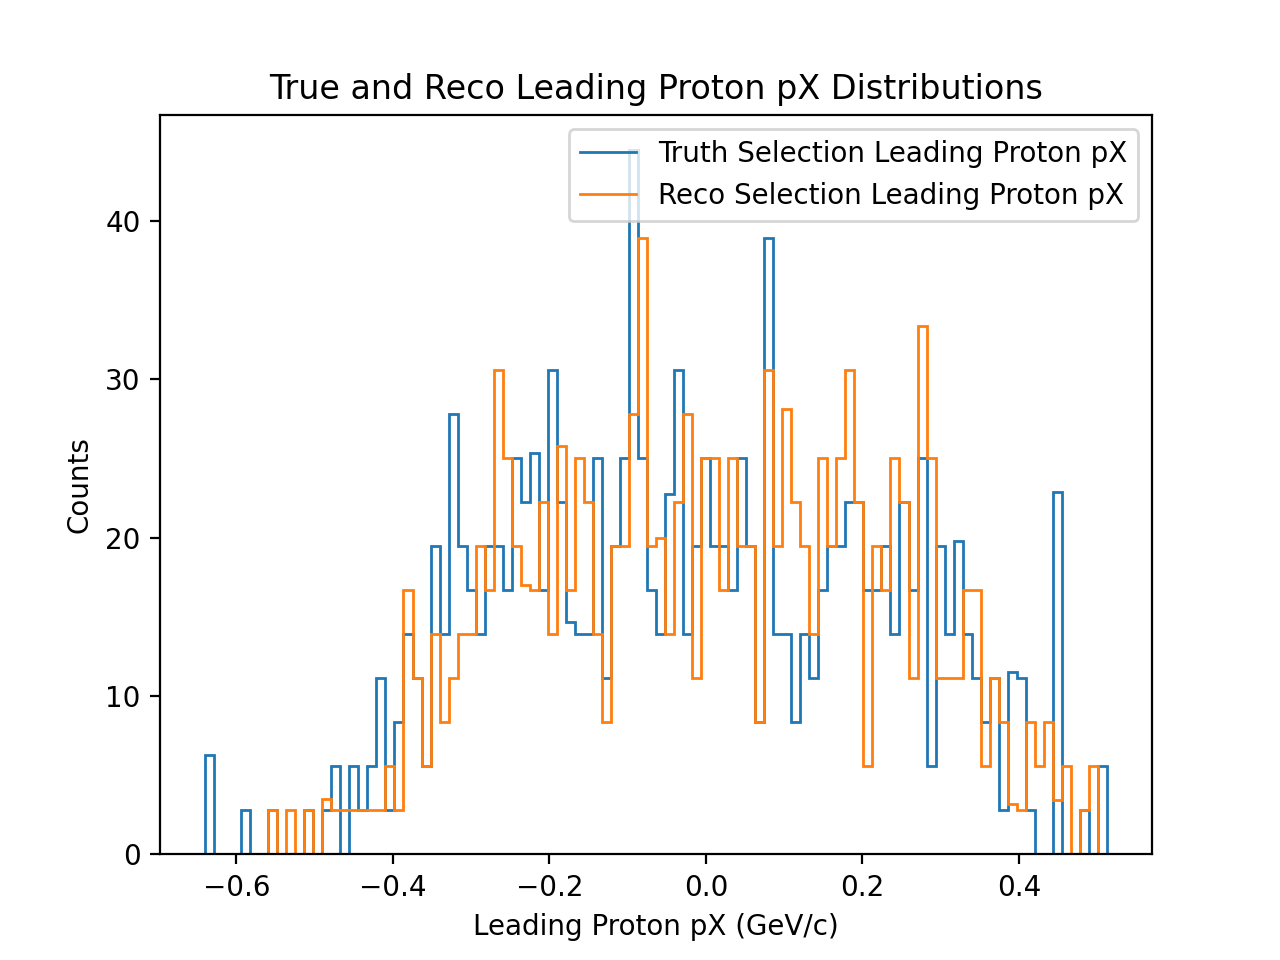

max value of truth:  0.51251318359375
max value of reco:  0.4961630746059892
maxRange:  0.51251318359375
truth bins:  [-0.6398913  -0.62836725 -0.61684321 -0.60531916 -0.59379512 -0.58227107
 -0.57074703 -0.55922298 -0.54769894 -0.53617489 -0.52465085 -0.5131268
 -0.50160276 -0.49007871 -0.47855467 -0.46703062 -0.45550658 -0.44398253
 -0.43245849 -0.42093445 -0.4094104  -0.39788636 -0.38636231 -0.37483827
 -0.36331422 -0.35179018 -0.34026613 -0.32874209 -0.31721804 -0.305694
 -0.29416995 -0.28264591 -0.27112186 -0.25959782 -0.24807377 -0.23654973
 -0.22502568 -0.21350164 -0.20197759 -0.19045355 -0.1789295  -0.16740546
 -0.15588141 -0.14435737 -0.13283333 -0.12130928 -0.10978524 -0.09826119
 -0.08673715 -0.0752131  -0.06368906 -0.05216501 -0.04064097 -0.02911692
 -0.01759288 -0.00606883  0.00545521  0.01697926  0.0285033   0.04002735
  0.05155139  0.06307544  0.07459948  0.08612353  0.09764757  0.10917162
  0.12069566  0.13221971  0.14374375  0.15526779  0.16679184  0.17831588
  0.18983

In [13]:
# truth and reco leading proton pX plot

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(truth_lp_pX_arr)
maxReco = np.max(reco_lp_pX_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(truth_lp_pX_arr)
minReco = np.min(reco_lp_pX_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(truth_lp_pX_arr, bins=numberBins, weights=weights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("truth bins: ", binsTrue)

print(sum(countsTrue))
print(sum(scaledCountsTrue))

countsReco, binsReco = np.histogram(reco_lp_pX_arr, bins=numberBins, weights=weights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("reco bins: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Selection Leading Proton pX")
plt.stairs(scaledCountsReco, binsReco, label="Reco Selection Leading Proton pX")

plt.xlabel('Leading Proton pX (GeV/c)')
plt.ylabel('Counts')
plt.title('True and Reco Leading Proton pX Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


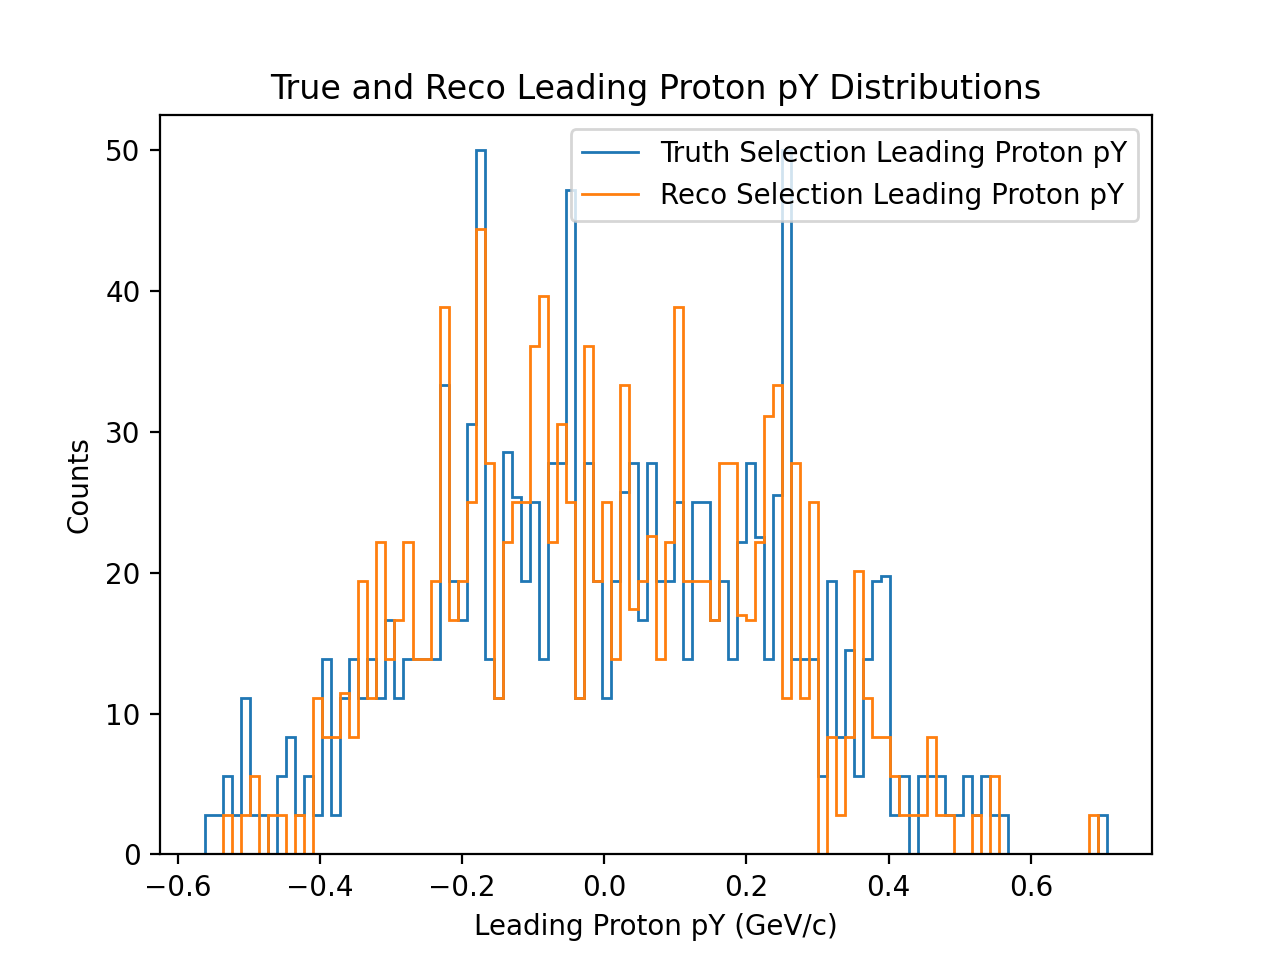

max value of truth:  0.7068457641601562
max value of reco:  0.6909639649900935
maxRange:  0.7068457641601562
truth bins:  [-0.56133661 -0.54865479 -0.53597296 -0.52329114 -0.51060931 -0.49792749
 -0.48524567 -0.47256384 -0.45988202 -0.4472002  -0.43451837 -0.42183655
 -0.40915472 -0.3964729  -0.38379108 -0.37110925 -0.35842743 -0.34574561
 -0.33306378 -0.32038196 -0.30770013 -0.29501831 -0.28233649 -0.26965466
 -0.25697284 -0.24429102 -0.23160919 -0.21892737 -0.20624554 -0.19356372
 -0.1808819  -0.16820007 -0.15551825 -0.14283643 -0.1301546  -0.11747278
 -0.10479095 -0.09210913 -0.07942731 -0.06674548 -0.05406366 -0.04138184
 -0.02870001 -0.01601819 -0.00333636  0.00934546  0.02202728  0.03470911
  0.04739093  0.06007275  0.07275458  0.0854364   0.09811823  0.11080005
  0.12348187  0.1361637   0.14884552  0.16152734  0.17420917  0.18689099
  0.19957281  0.21225464  0.22493646  0.23761829  0.25030011  0.26298193
  0.27566376  0.28834558  0.3010274   0.31370923  0.32639105  0.33907288
  

In [14]:
# truth and reco leading proton pY plot

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(truth_lp_pY_arr)
maxReco = np.max(reco_lp_pY_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(truth_lp_pY_arr)
minReco = np.min(reco_lp_pY_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(truth_lp_pY_arr, bins=numberBins, weights=weights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("truth bins: ", binsTrue)

print(sum(countsTrue))
print(sum(scaledCountsTrue))

countsReco, binsReco = np.histogram(reco_lp_pY_arr, bins=numberBins, weights=weights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("reco bins: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Selection Leading Proton pY")
plt.stairs(scaledCountsReco, binsReco, label="Reco Selection Leading Proton pY")

plt.xlabel('Leading Proton pY (GeV/c)')
plt.ylabel('Counts')
plt.title('True and Reco Leading Proton pY Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


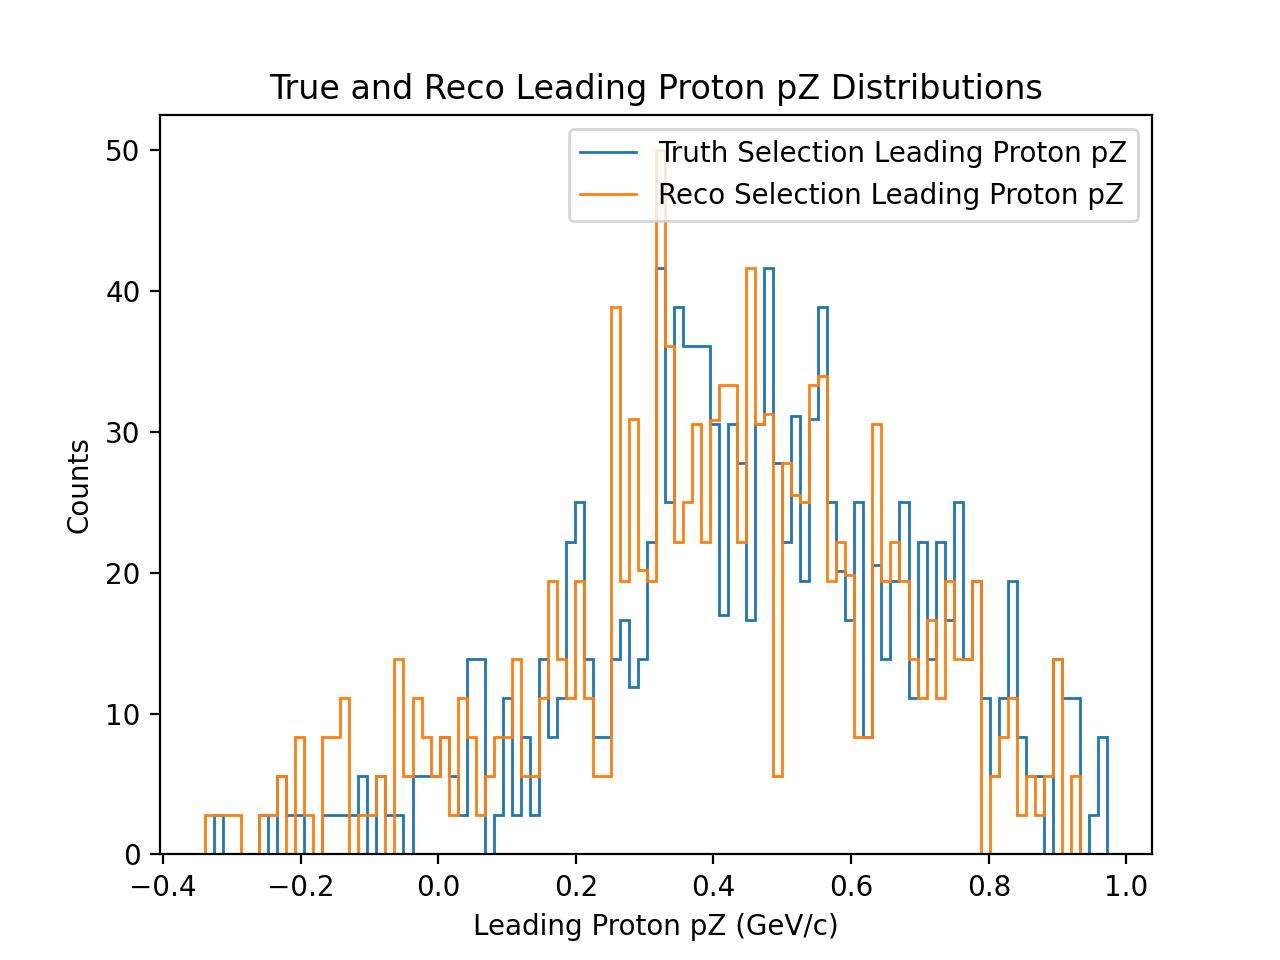

max value of truth:  0.9715883178710938
max value of reco:  0.9276670074886426
maxRange:  0.9715883178710938
truth bins:  [-0.33864173 -0.32553943 -0.31243713 -0.29933483 -0.28623253 -0.27313023
 -0.26002793 -0.24692563 -0.23382333 -0.22072102 -0.20761872 -0.19451642
 -0.18141412 -0.16831182 -0.15520952 -0.14210722 -0.12900492 -0.11590262
 -0.10280032 -0.08969802 -0.07659572 -0.06349342 -0.05039112 -0.03728882
 -0.02418652 -0.01108422  0.00201808  0.01512038  0.02822268  0.04132498
  0.05442729  0.06752959  0.08063189  0.09373419  0.10683649  0.11993879
  0.13304109  0.14614339  0.15924569  0.17234799  0.18545029  0.19855259
  0.21165489  0.22475719  0.23785949  0.25096179  0.26406409  0.27716639
  0.29026869  0.30337099  0.31647329  0.32957559  0.3426779   0.3557802
  0.3688825   0.3819848   0.3950871   0.4081894   0.4212917   0.434394
  0.4474963   0.4605986   0.4737009   0.4868032   0.4999055   0.5130078
  0.5261101   0.5392124   0.5523147   0.565417    0.5785193   0.5916216
  0.604

In [15]:
# truth and reco leading proton pZ plot

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(truth_lp_pZ_arr)
maxReco = np.max(reco_lp_pZ_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(truth_lp_pZ_arr)
minReco = np.min(reco_lp_pZ_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(truth_lp_pZ_arr, bins=numberBins, weights=weights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("truth bins: ", binsTrue)

print(sum(countsTrue))
print(sum(scaledCountsTrue))

countsReco, binsReco = np.histogram(reco_lp_pZ_arr, bins=numberBins, weights=weights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("reco bins: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Selection Leading Proton pZ")
plt.stairs(scaledCountsReco, binsReco, label="Reco Selection Leading Proton pZ")

plt.xlabel('Leading Proton pZ (GeV/c)')
plt.ylabel('Counts')
plt.title('True and Reco Leading Proton pZ Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

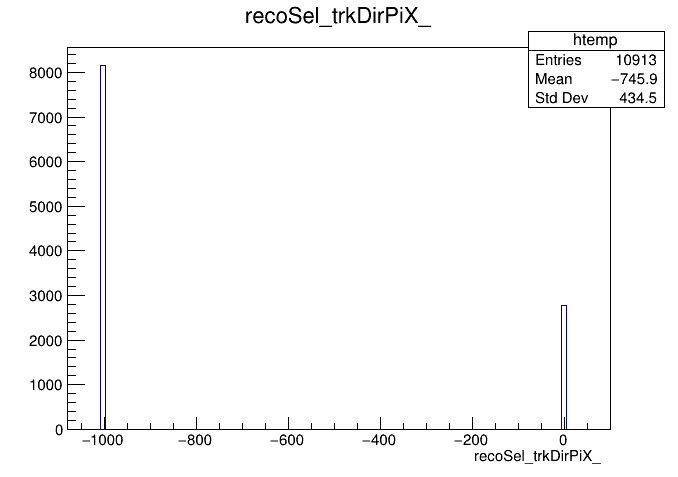

In [16]:
canvas = TCanvas("frNoSC","frNoSC",720,152,682,505)
canvas.cd()
f.selectedEvents.Draw("recoSel_trkDirPiX_","","COLZ")
canvas.Draw()

In [17]:
t.GetEntry(5)

# sum of transverse momenta of the 3 particles
def delPT(pxPi, pxP, pxMu, pyPi, pyP, pyMu): 
    
    #print("pxPi, pxP, pxMu: ", pxPi, ", ", pxP, ", ", pxMu)
    #print("pyPi, pyP, pyMu: ", pyPi, ", ", pyP, ", ", pyMu)
    
    pTMu = np.array([pxMu, pyMu, 0])
    #print("pTMu: ", pTMu)
    
    pTP = np.array([pxP, pyP, 0])
    #print("pTP: ", pTP)
    
    pTPi = np.array([pxPi, pyPi, 0])
    #print("pTPi: ", pTPi)
    
    return pTMu + pTPi + pTP

reco_delPT_test = delPT(t.recoSel_trkDirPiX_, t.recoSel_trkDirPX_, t.recoSel_trkDirMuX_, t.recoSel_trkDirPiY_, t.recoSel_trkDirPY_, t.recoSel_trkDirMuY_)
#truth_delPT_test = delPT(t.truthSel_pxPi_, t.truthSel_pxP_, t.truthSel_pxMu_, t.truthSel_pyPi_, t.truthSel_pyP_, t.truthSel_pyMu_)

print(reco_delPT_test)
#print(truth_delPT_test)

print(reco_delPT_test[0])

[-0.26753789 -0.16911117  0.        ]
-0.26753789248469306


In [18]:
t.GetEntry(5)

epsilon = 0.0309 # in GeV

# longitudinal component, the long way
def pL(pzP, pzMu, pzPi, eP, eMu, ePi, delPT): # assume everything is in GeV
    mP = constants.physical_constants['proton mass energy equivalent in MeV'][0]/1000 
    #print("mP: ", mP)
    mN = constants.physical_constants['neutron mass energy equivalent in MeV'][0]/1000
    #print("mN: ", mN)
    B = 0.34381
    mA = 22*mN + 18*mP - B
    mA1 = mA - mN + epsilon
    del2 = np.dot(delPT, delPT)
    #pLP = np.array([0, 0, pzP])
    #pLMu = np.array([0, 0, pzMu])
    #pLPi = np.array([0, 0, pzPi])
    parens = mA + pzMu + pzPi + pzP - eMu - ePi - eP
    return 0.5*(parens) - 0.5*((del2+mA1**2)/(parens))

pL_test = pL(t.recoSel_trkDirPZ_, t.recoSel_trkDirMuZ_, t.recoSel_trkDirPiZ_, t.recoSel_eP_, t.recoSel_eMu_, t.recoSel_ePi_, reco_delPT_test)
#print(t.pzP_)
print("pL_test: ", pL_test)

def pLGKI(pzP, pzMu, pzPi, eP, eMu, ePi):
    pRest = constants.physical_constants['proton mass energy equivalent in MeV'][0]/1000
    piRest = 139.57/1000 # GeV
    #print("piRest:", piRest)
    #Ecal = eMu + (eP-pRest) + (ePi-piRest) + epsilon
    Ecal = eMu + (eP-pRest) + ePi + epsilon
    return pzMu + pzP + pzPi - Ecal

pLGKI_test = pLGKI(t.recoSel_trkDirPZ_, t.recoSel_trkDirMuZ_, t.recoSel_trkDirPiZ_, t.recoSel_eP_, t.recoSel_eMu_, t.recoSel_ePi_)
print("pLGKI_test: ", pLGKI_test)

pL_test:  -0.006847073443509544
pLGKI_test:  -0.006760224706575335


In [19]:
reco_eMu = []
truth_eMu = []

reco_ePi = []
truth_ePi = []

reco_eP = []
truth_eP = []

reco_delPT_x = []
truth_delPT_x = []

reco_delPT_y = []
truth_delPT_y = []

reco_pL = []
truth_pL = []

delPT_weights_list = []

# main loop
for e in range(entries):
    
    t.GetEntry(e)
    
    if (t.passedSel_ == 3): # passes both selection
        
        reco_delPT = delPT(t.recoSel_trkDirPiX_, t.recoSel_trkDirPX_, t.recoSel_trkDirMuX_, t.recoSel_trkDirPiY_, t.recoSel_trkDirPY_, t.recoSel_trkDirMuY_)
        truth_delPT = delPT(t.truthSel_pxPi_, t.truthSel_pxP_, t.truthSel_pxMu_, t.truthSel_pyPi_, t.truthSel_pyP_, t.truthSel_pyMu_)

        reco_delPT_x.append(reco_delPT[0])
        reco_delPT_y.append(reco_delPT[1])
        
        truth_delPT_x.append(truth_delPT[0])
        truth_delPT_y.append(truth_delPT[1])
        
        reco_pL_test = pL(t.recoSel_trkDirPZ_, t.recoSel_trkDirMuZ_, t.recoSel_trkDirPiZ_, t.recoSel_eP_, t.recoSel_eMu_, t.recoSel_ePi_, reco_delPT)
        truth_pL_test = pL(t.truthSel_pzP_, t.truthSel_pzMu_, t.truthSel_pzPi_, t.truthSel_eP_, t.truthSel_eMu_, t.truthSel_ePi_, truth_delPT)
        
        reco_pL.append(reco_pL_test)
        truth_pL.append(truth_pL_test)
        
        reco_eMu.append(t.recoSel_eMu_)
        truth_eMu.append(t.truthSel_eMu_)
        
        reco_ePi.append(t.recoSel_ePi_)
        truth_ePi.append(t.truthSel_ePi_)
        
        reco_eP.append(t.recoSel_eP_)
        truth_eP.append(t.truthSel_eP_)
                
        delPT_weights_list.append(t.weight_)
        
    
reco_delPT_x_arr = np.asarray(reco_delPT_x)
reco_delPT_y_arr = np.asarray(reco_delPT_y)

truth_delPT_x_arr = np.asarray(truth_delPT_x)
truth_delPT_y_arr = np.asarray(truth_delPT_y)

reco_pL_arr = np.asarray(reco_pL)
truth_pL_arr = np.asarray(truth_pL)

reco_eMu_arr = np.asarray(reco_eMu)
truth_eMu_arr = np.asarray(truth_eMu)

reco_ePi_arr = np.asarray(reco_ePi)
truth_ePi_arr = np.asarray(truth_ePi)

reco_eP_arr = np.asarray(reco_eP)
truth_eP_arr = np.asarray(truth_eP)
    
delPT_weights_arr = np.asarray(delPT_weights_list)

print(reco_eP)
print("  ")
print(truth_eP)
        



[1.0321245510864256, 1.1963491528320311, 1.1849107220458983, 1.0968890240478515, 1.0176055920410156, 1.2167164624023437, 1.2319554150390624, 1.1719808819580078, 1.0926199963378906, 1.0905738079833984, 1.1178941052246094, 1.1082967388916016, 0.9862075741577148, 1.2039961560058594, 0.9875031826782227, 1.0449430706787108, 1.000958810119629, 1.033948067932129, 0.9934282048034667, 1.2067375805664062, 1.3561784375, 1.2791184094238282, 1.0966573498535157, 1.0182981350708007, 1.0294586575317382, 1.0491689312744141, 1.1256919110107422, 1.2316410534667968, 1.043784295349121, 0.9932148068237304, 0.992527344970703, 1.034234261779785, 1.0739806683349609, 1.1561389477539061, 1.1648255932617186, 1.0920244458007813, 1.0048684552001952, 1.1376896374511718, 1.0188049481201171, 1.270082276611328, 1.02684396484375, 1.0384174435424804, 0.9976523297119141, 1.0690505383300781, 1.1514926159667969, 1.0524209759521483, 1.0376176007080078, 1.0460826351928711, 1.0219609310913085, 1.030112145690918, 1.191918565063

<IPython.core.display.Javascript object>


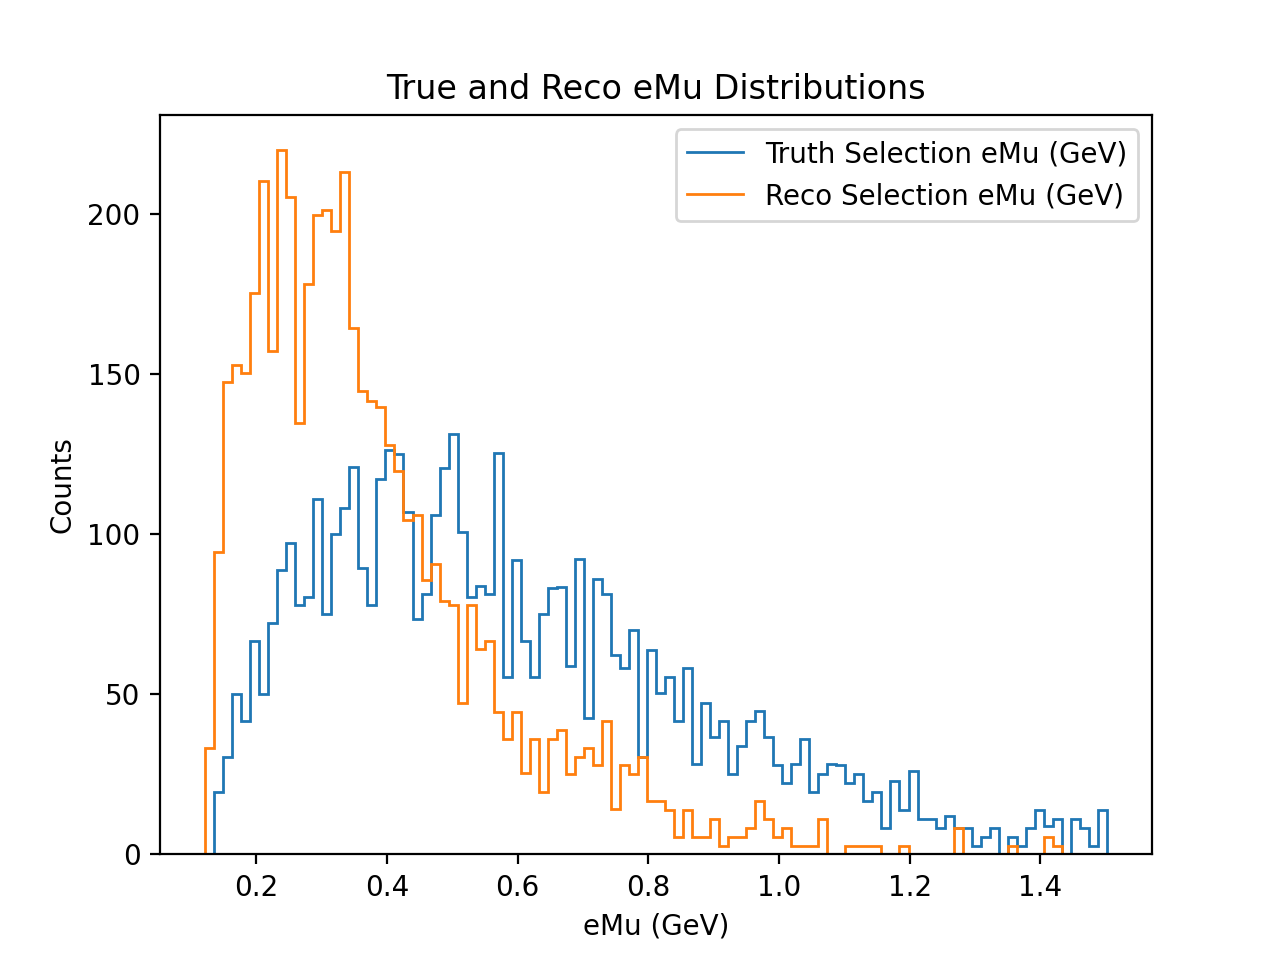

max value of truth:  1.501816650390625
max value of reco:  1.4247848779296877
maxRange:  1.501816650390625
truth bins:  [0.12163129 0.13543315 0.149235   0.16303685 0.17683871 0.19064056
 0.20444241 0.21824427 0.23204612 0.24584798 0.25964983 0.27345168
 0.28725354 0.30105539 0.31485724 0.3286591  0.34246095 0.3562628
 0.37006466 0.38386651 0.39766836 0.41147022 0.42527207 0.43907393
 0.45287578 0.46667763 0.48047949 0.49428134 0.50808319 0.52188505
 0.5356869  0.54948875 0.56329061 0.57709246 0.59089431 0.60469617
 0.61849802 0.63229988 0.64610173 0.65990358 0.67370544 0.68750729
 0.70130914 0.715111   0.72891285 0.7427147  0.75651656 0.77031841
 0.78412026 0.79792212 0.81172397 0.82552583 0.83932768 0.85312953
 0.86693139 0.88073324 0.89453509 0.90833695 0.9221388  0.93594065
 0.94974251 0.96354436 0.97734621 0.99114807 1.00494992 1.01875178
 1.03255363 1.04635548 1.06015734 1.07395919 1.08776104 1.1015629
 1.11536475 1.1291666  1.14296846 1.15677031 1.17057216 1.18437402
 1.19817587

In [20]:
# truth and reco eMu plot

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(truth_eMu_arr)
maxReco = np.max(reco_eMu_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(truth_eMu_arr)
minReco = np.min(reco_eMu_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(truth_eMu_arr, bins=numberBins, weights=delPT_weights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("truth bins: ", binsTrue)

print(sum(countsTrue))
print(sum(scaledCountsTrue))

countsReco, binsReco = np.histogram(reco_eMu_arr, bins=numberBins, weights=delPT_weights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("reco bins: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Selection eMu (GeV)")
plt.stairs(scaledCountsReco, binsReco, label="Reco Selection eMu (GeV)")

plt.xlabel('eMu (GeV)')
plt.ylabel('Counts')
plt.title('True and Reco eMu Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


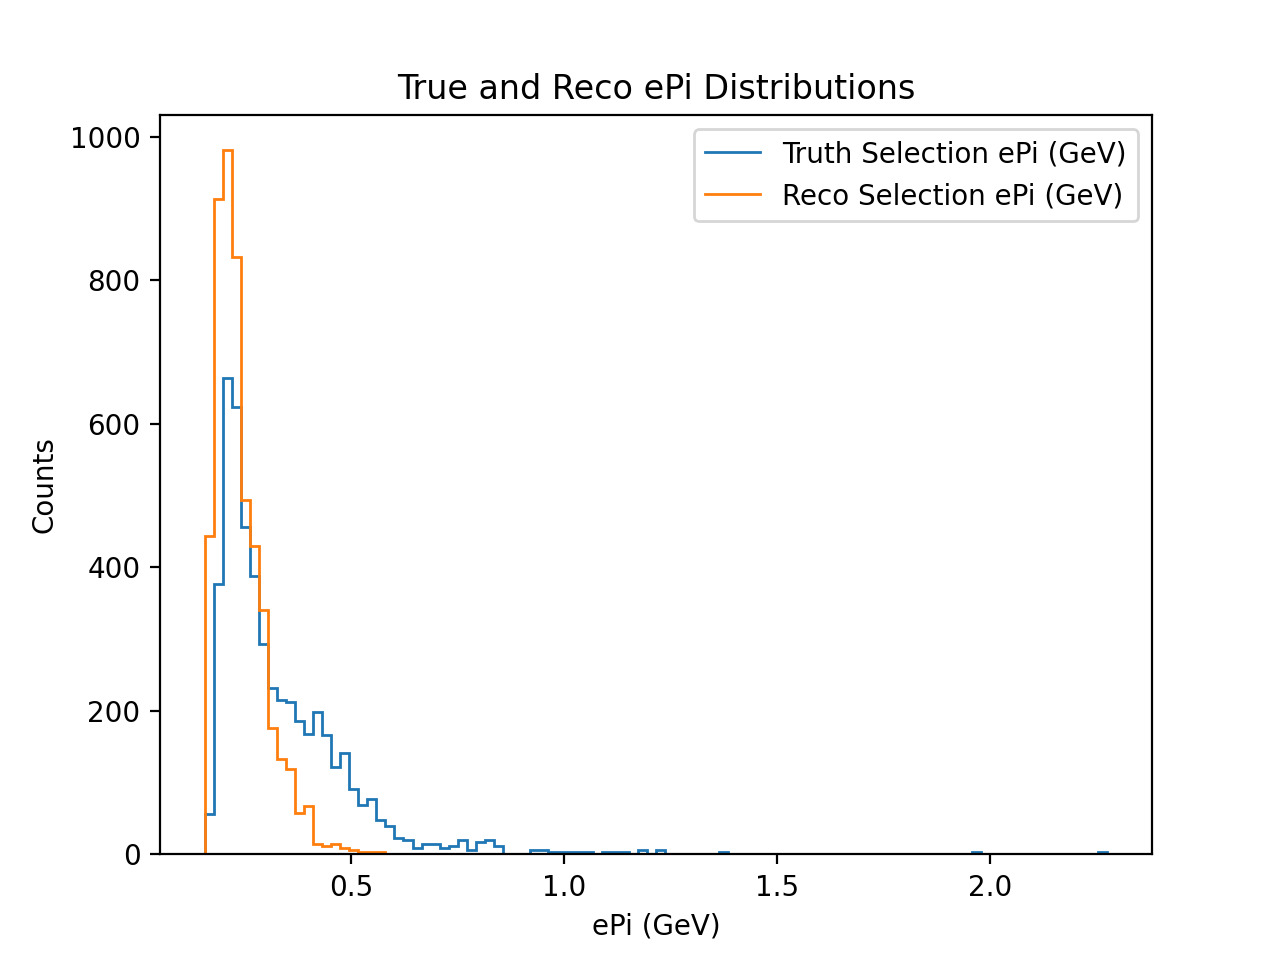

max value of truth:  2.27410986328125
max value of reco:  0.5726501098632812
maxRange:  2.27410986328125
truth bins:  [0.15673464 0.17790839 0.19908214 0.2202559  0.24142965 0.2626034
 0.28377715 0.30495091 0.32612466 0.34729841 0.36847216 0.38964591
 0.41081967 0.43199342 0.45316717 0.47434092 0.49551468 0.51668843
 0.53786218 0.55903593 0.58020968 0.60138344 0.62255719 0.64373094
 0.66490469 0.68607845 0.7072522  0.72842595 0.7495997  0.77077345
 0.79194721 0.81312096 0.83429471 0.85546846 0.87664222 0.89781597
 0.91898972 0.94016347 0.96133722 0.98251098 1.00368473 1.02485848
 1.04603223 1.06720599 1.08837974 1.10955349 1.13072724 1.15190099
 1.17307475 1.1942485  1.21542225 1.236596   1.25776976 1.27894351
 1.30011726 1.32129101 1.34246476 1.36363852 1.38481227 1.40598602
 1.42715977 1.44833353 1.46950728 1.49068103 1.51185478 1.53302854
 1.55420229 1.57537604 1.59654979 1.61772354 1.6388973  1.66007105
 1.6812448  1.70241855 1.72359231 1.74476606 1.76593981 1.78711356
 1.80828731 

In [21]:
# truth and reco ePi plot

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(truth_ePi_arr)
maxReco = np.max(reco_ePi_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(truth_ePi_arr)
minReco = np.min(reco_ePi_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(truth_ePi_arr, bins=numberBins, weights=delPT_weights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("truth bins: ", binsTrue)

print(sum(countsTrue))
print(sum(scaledCountsTrue))

countsReco, binsReco = np.histogram(reco_ePi_arr, bins=numberBins, weights=delPT_weights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("reco bins: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Selection ePi (GeV)")
plt.stairs(scaledCountsReco, binsReco, label="Reco Selection ePi (GeV)")

plt.xlabel('ePi (GeV)')
plt.ylabel('Counts')
plt.title('True and Reco ePi Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


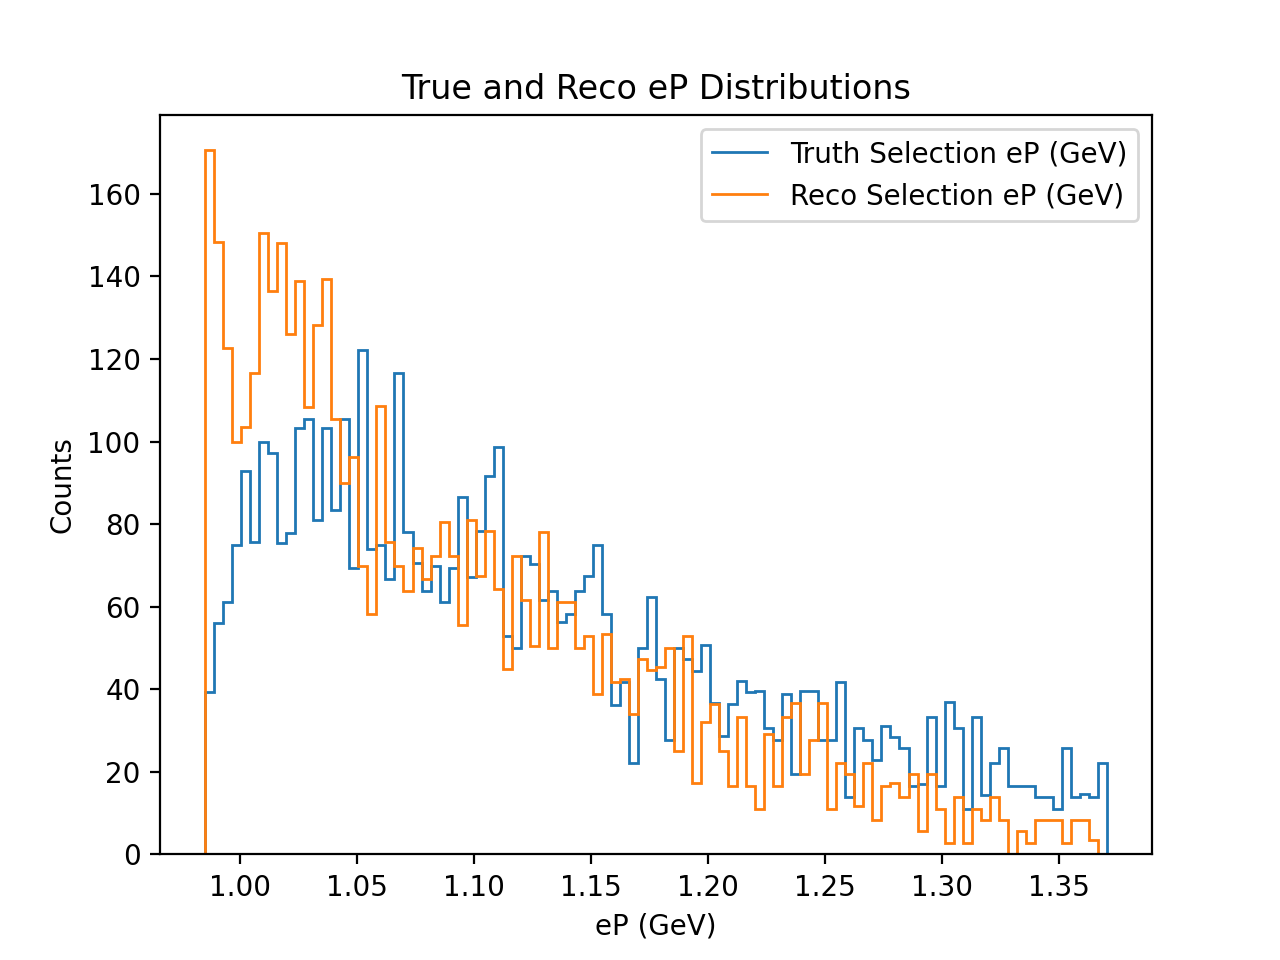

max value of truth:  1.3705892333984375
max value of reco:  1.3632479260253907
maxRange:  1.3705892333984375
truth bins:  [0.98522831 0.98908192 0.99293553 0.99678914 1.00064275 1.00449636
 1.00834997 1.01220358 1.01605718 1.01991079 1.0237644  1.02761801
 1.03147162 1.03532523 1.03917884 1.04303245 1.04688606 1.05073967
 1.05459328 1.05844689 1.0623005  1.0661541  1.07000771 1.07386132
 1.07771493 1.08156854 1.08542215 1.08927576 1.09312937 1.09698298
 1.10083659 1.1046902  1.10854381 1.11239742 1.11625102 1.12010463
 1.12395824 1.12781185 1.13166546 1.13551907 1.13937268 1.14322629
 1.1470799  1.15093351 1.15478712 1.15864073 1.16249434 1.16634794
 1.17020155 1.17405516 1.17790877 1.18176238 1.18561599 1.1894696
 1.19332321 1.19717682 1.20103043 1.20488404 1.20873765 1.21259126
 1.21644486 1.22029847 1.22415208 1.22800569 1.2318593  1.23571291
 1.23956652 1.24342013 1.24727374 1.25112735 1.25498096 1.25883457
 1.26268818 1.26654178 1.27039539 1.274249   1.27810261 1.28195622
 1.28580

In [22]:
# truth and reco eP plot

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(truth_eP_arr)
maxReco = np.max(reco_eP_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(truth_eP_arr)
minReco = np.min(reco_eP_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(truth_eP_arr, bins=numberBins, weights=delPT_weights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("truth bins: ", binsTrue)

print(sum(countsTrue))
print(sum(scaledCountsTrue))

countsReco, binsReco = np.histogram(reco_eP_arr, bins=numberBins, weights=delPT_weights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("reco bins: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Selection eP (GeV)")
plt.stairs(scaledCountsReco, binsReco, label="Reco Selection eP (GeV)")

plt.xlabel('eP (GeV)')
plt.ylabel('Counts')
plt.title('True and Reco eP Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


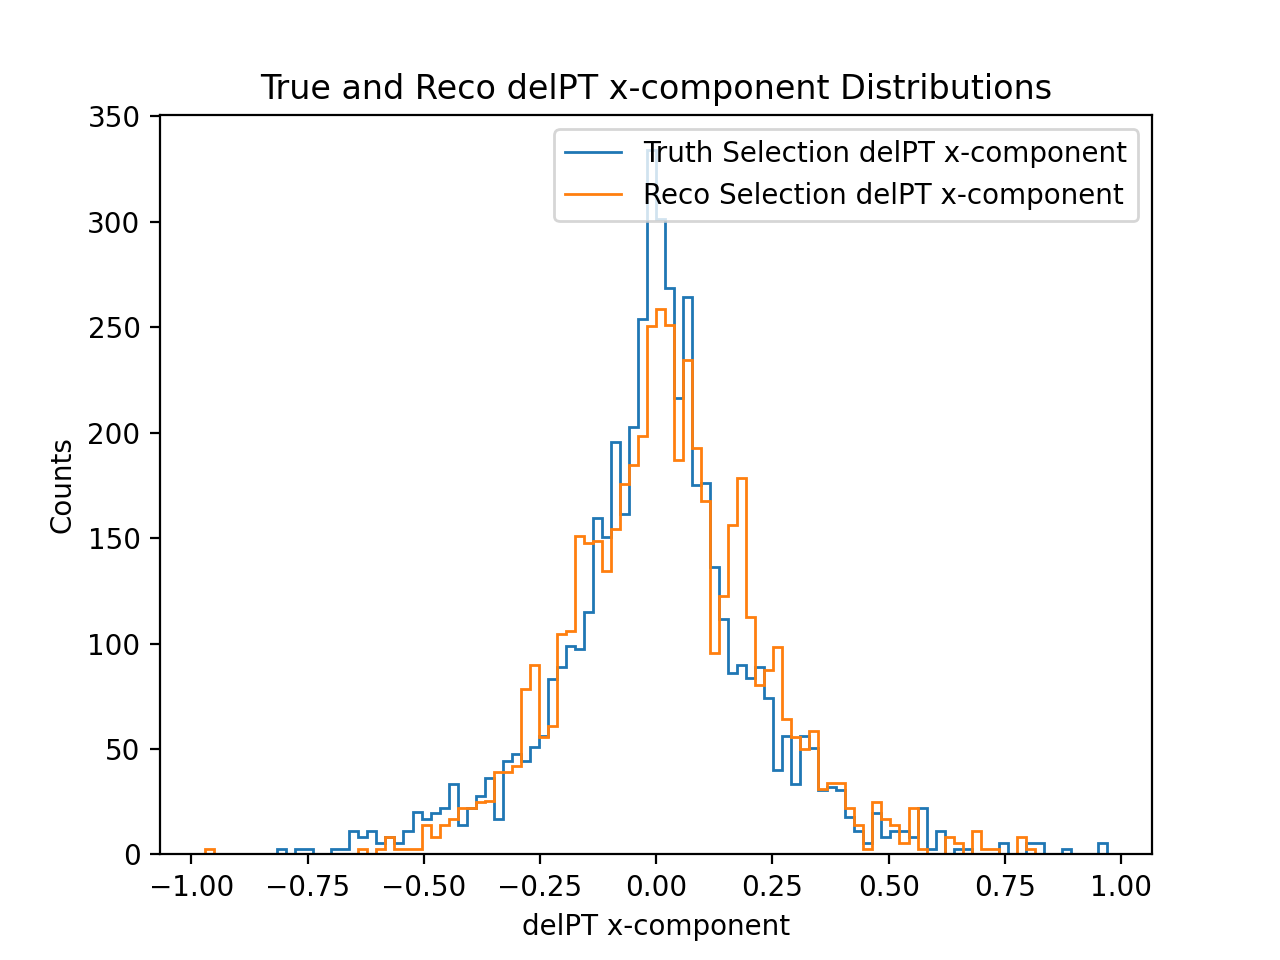

max value of truth:  0.9695461959838868
max value of reco:  0.809909897556643
maxRange:  0.9695461959838868
truth bins:  [-9.70458457e-01 -9.51058411e-01 -9.31658364e-01 -9.12258318e-01
 -8.92858271e-01 -8.73458224e-01 -8.54058178e-01 -8.34658131e-01
 -8.15258085e-01 -7.95858038e-01 -7.76457992e-01 -7.57057945e-01
 -7.37657899e-01 -7.18257852e-01 -6.98857806e-01 -6.79457759e-01
 -6.60057713e-01 -6.40657666e-01 -6.21257620e-01 -6.01857573e-01
 -5.82457526e-01 -5.63057480e-01 -5.43657433e-01 -5.24257387e-01
 -5.04857340e-01 -4.85457294e-01 -4.66057247e-01 -4.46657201e-01
 -4.27257154e-01 -4.07857108e-01 -3.88457061e-01 -3.69057015e-01
 -3.49656968e-01 -3.30256922e-01 -3.10856875e-01 -2.91456829e-01
 -2.72056782e-01 -2.52656735e-01 -2.33256689e-01 -2.13856642e-01
 -1.94456596e-01 -1.75056549e-01 -1.55656503e-01 -1.36256456e-01
 -1.16856410e-01 -9.74563632e-02 -7.80563167e-02 -5.86562701e-02
 -3.92562236e-02 -1.98561771e-02 -4.56130556e-04  1.89439160e-02
  3.83439625e-02  5.77440090e-02  

In [23]:
# truth and reco leading delPT x-component plot

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(truth_delPT_x_arr)
maxReco = np.max(reco_delPT_x_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(truth_delPT_x_arr)
minReco = np.min(reco_delPT_x_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(truth_delPT_x_arr, bins=numberBins, weights=delPT_weights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("truth bins: ", binsTrue)

print(sum(countsTrue))
print(sum(scaledCountsTrue))

countsReco, binsReco = np.histogram(reco_delPT_x_arr, bins=numberBins, weights=delPT_weights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("reco bins: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Selection delPT x-component")
plt.stairs(scaledCountsReco, binsReco, label="Reco Selection delPT x-component")

plt.xlabel('delPT x-component')
plt.ylabel('Counts')
plt.title('True and Reco delPT x-component Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


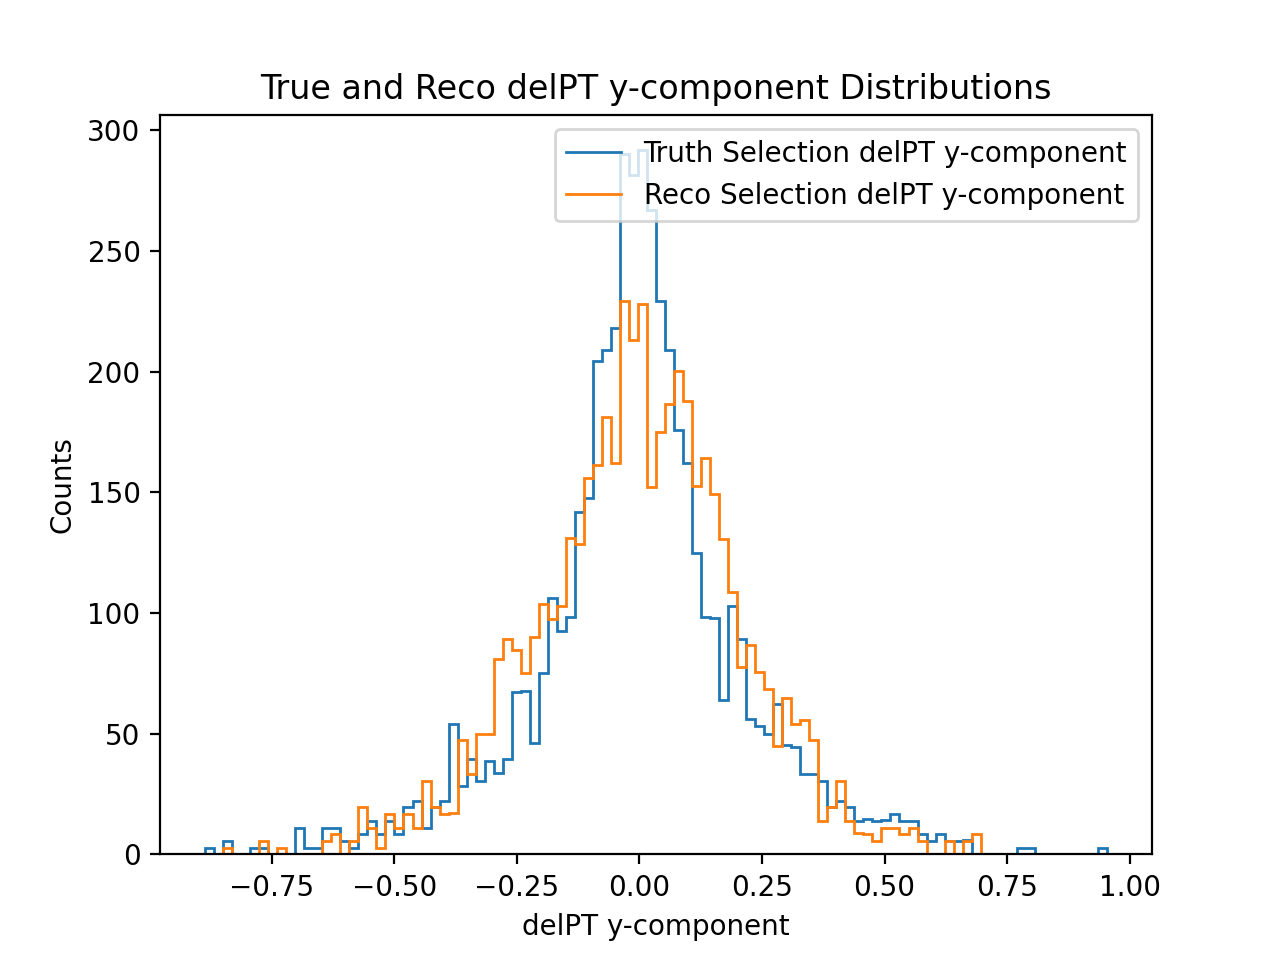

max value of truth:  0.9534962463378907
max value of reco:  0.678522691934444
maxRange:  0.9534962463378907
truth bins:  [-0.88550921 -0.86711915 -0.8487291  -0.83033905 -0.81194899 -0.79355894
 -0.77516888 -0.75677883 -0.73838877 -0.71999872 -0.70160866 -0.68321861
 -0.66482855 -0.6464385  -0.62804844 -0.60965839 -0.59126834 -0.57287828
 -0.55448823 -0.53609817 -0.51770812 -0.49931806 -0.48092801 -0.46253795
 -0.4441479  -0.42575784 -0.40736779 -0.38897774 -0.37058768 -0.35219763
 -0.33380757 -0.31541752 -0.29702746 -0.27863741 -0.26024735 -0.2418573
 -0.22346724 -0.20507719 -0.18668714 -0.16829708 -0.14990703 -0.13151697
 -0.11312692 -0.09473686 -0.07634681 -0.05795675 -0.0395667  -0.02117664
 -0.00278659  0.01560346  0.03399352  0.05238357  0.07077363  0.08916368
  0.10755374  0.12594379  0.14433385  0.1627239   0.18111396  0.19950401
  0.21789406  0.23628412  0.25467417  0.27306423  0.29145428  0.30984434
  0.32823439  0.34662445  0.3650145   0.38340456  0.40179461  0.42018466
  0.

In [24]:
# truth and reco leading delPT x-component plot

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(truth_delPT_y_arr)
maxReco = np.max(reco_delPT_y_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(truth_delPT_y_arr)
minReco = np.min(reco_delPT_y_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(truth_delPT_y_arr, bins=numberBins, weights=delPT_weights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("truth bins: ", binsTrue)

print(sum(countsTrue))
print(sum(scaledCountsTrue))

countsReco, binsReco = np.histogram(reco_delPT_y_arr, bins=numberBins, weights=delPT_weights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("reco bins: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Selection delPT y-component")
plt.stairs(scaledCountsReco, binsReco, label="Reco Selection delPT y-component")

plt.xlabel('delPT y-component')
plt.ylabel('Counts')
plt.title('True and Reco delPT y-component Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


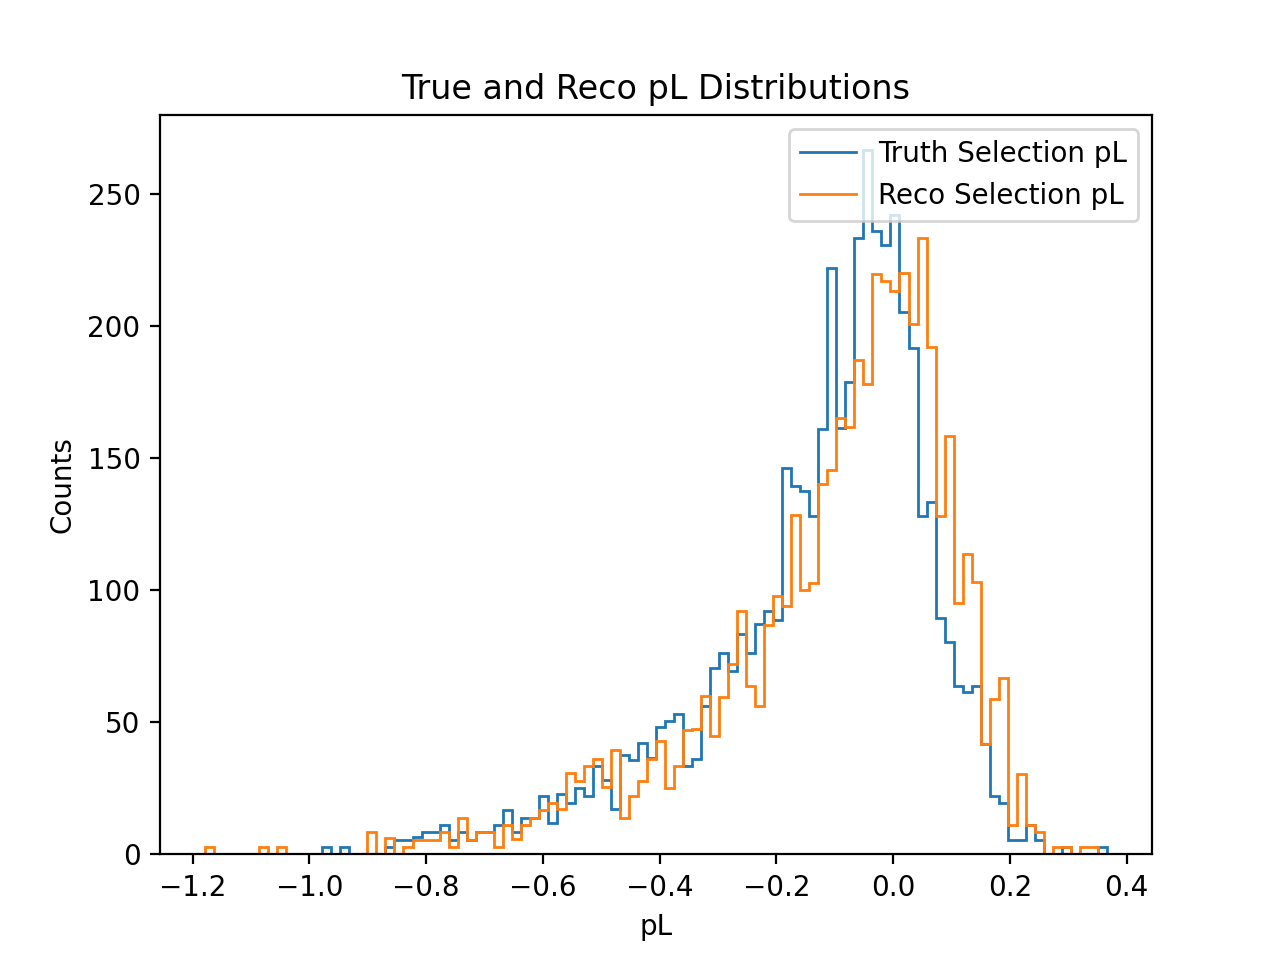

max value of truth:  0.3663425164799712
max value of reco:  0.3474989427923205
maxRange:  0.3663425164799712
truth bins:  [-1.1785599  -1.16311088 -1.14766185 -1.13221283 -1.11676381 -1.10131478
 -1.08586576 -1.07041673 -1.05496771 -1.03951868 -1.02406966 -1.00862064
 -0.99317161 -0.97772259 -0.96227356 -0.94682454 -0.93137552 -0.91592649
 -0.90047747 -0.88502844 -0.86957942 -0.85413039 -0.83868137 -0.82323235
 -0.80778332 -0.7923343  -0.77688527 -0.76143625 -0.74598722 -0.7305382
 -0.71508918 -0.69964015 -0.68419113 -0.6687421  -0.65329308 -0.63784406
 -0.62239503 -0.60694601 -0.59149698 -0.57604796 -0.56059893 -0.54514991
 -0.52970089 -0.51425186 -0.49880284 -0.48335381 -0.46790479 -0.45245577
 -0.43700674 -0.42155772 -0.40610869 -0.39065967 -0.37521064 -0.35976162
 -0.3443126  -0.32886357 -0.31341455 -0.29796552 -0.2825165  -0.26706748
 -0.25161845 -0.23616943 -0.2207204  -0.20527138 -0.18982235 -0.17437333
 -0.15892431 -0.14347528 -0.12802626 -0.11257723 -0.09712821 -0.08167918
 -0

In [25]:
# truth and reco pL plot

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(truth_pL_arr)
maxReco = np.max(reco_pL_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(truth_pL_arr)
minReco = np.min(reco_pL_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(truth_pL_arr, bins=numberBins, weights=delPT_weights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("truth bins: ", binsTrue)

print(sum(countsTrue))
print(sum(scaledCountsTrue))

countsReco, binsReco = np.histogram(reco_pL_arr, bins=numberBins, weights=delPT_weights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("reco bins: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Selection pL")
plt.stairs(scaledCountsReco, binsReco, label="Reco Selection pL")

plt.xlabel('pL')
plt.ylabel('Counts')
plt.title('True and Reco pL Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)